## Метод главных компонент [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Метод главных компонент (PCA) - используется для снижения размерности данных за их счет проекции на ортогональное подпространство (тем самым устраняя линейные зависимости между признаками).

Для сохранения максимальной информации необходимо изменив базис сохранить максимальную дисперсию признаков. Покажем наглядно на 2-х мерном пространстве.

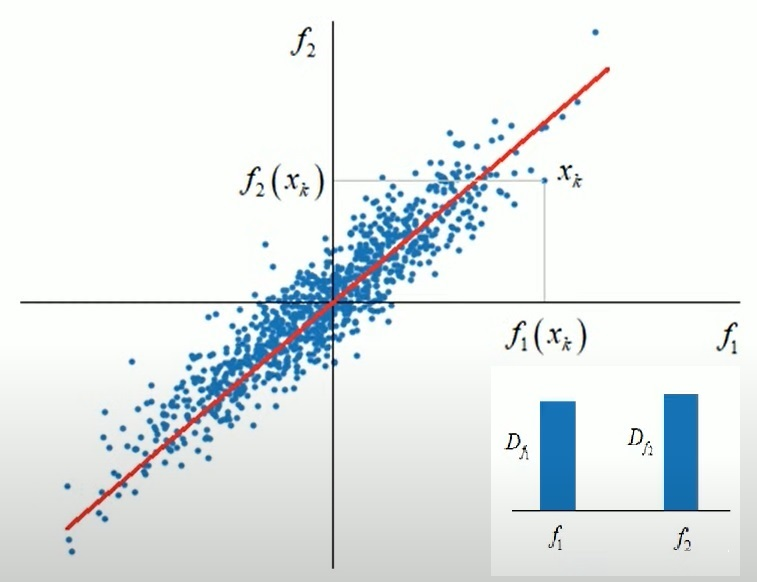

Здесь видим что дисперсия равнораспределена между обоими признаками (осями) и если мы просто отбросим признак потеряем половину информации. Но по данному графику хорошо видно что простым преобразованием базиса (поворота на 45 градусов против часовой стрелки) мы можем добиться перераспределения диспрерсии.

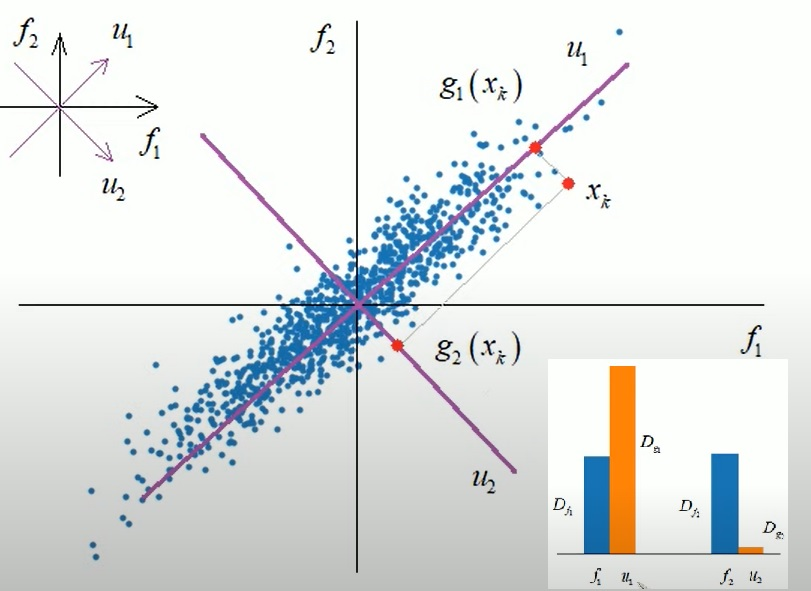

Соответственно в таком новом базисе отбросив второй признак информации будет потеряно гораздо меньше. 

Таким образом, для перехода из системы координат f1f2 в систему координат g1g2 необходимо определить матрицу перехода U и умножить ее справа на изначальную матрицу величин. 

$G_k = U*F_k$ , где U в случае поворота на 45 градусов U = $\left[  \frac{1/\sqrt{2} \text{ }\text{ }\text{ }\text{ }\text{ } 1/\sqrt{2}} {1/\sqrt{2} \text{ } -1/\sqrt{2}}  \right]$

При этом данное преобразованиие является обратимым $F_k = U^T*G_k$

Распространим 2-х мерный случай на n-мерный.

Предположим что размер пространства $n$, для того чтобы снизить размерность до $k$ (где $k < n$) необходимо расчитать дисперсию вдоль каждой оси и выбрать оси с минимальной потерей информации или дисперсии.

Многомерный вариант дисперсии - это матрица ковариаций. Ковариация - мера зависимости двух случайных величин и по определению равна:
$$Cov(X_i, X_j) = E[(X_i - E(X_i))*(X_j - E(X_j))] = E(X_i X_j) - E(X_i)*E(X_j)$$
Если произветсти предварительную центровку матрицы исходного пространства (из каждого ряда/признака вычесть среднее значение), то удастся избавиться от второго компонента в формуле и свести ее к матрице математического ожидания произведения признаков
$$Cov(X_i, X_j) = E(X_i X_j)$$
Где для $X_i = X_j$ в ячейках будет величина дисперсии признака $Cov(X_i, X_j) = Var(X_i)$ а в остальных ячейках ковариация между признаками. Соответственно матрица ковариаций будет являться симметричной поскольку $Cov(X_i, X_j) = Cov(X_j, X_i)$ и которую можно вычислить по формуле
$$E(X_i X_j) = \frac{1}{n} X^T*X$$

Максимальная вариация нашего набора данных будет достигаться вдоль собственного вектора этой матрицы, соответствующего максимальному собственному значению. Таким образом главные компоненты, на которые мы бы хотели спроецировать наши данные, являются просто собственными векторами соответствующих топ-$k$ штук собственных значений этой матрицы.

Задача практически решена, для уменьшения размерности осталось умножить нашу матрицу данных на эти компоненты и мы получим проекцию наших данных в ортогональном базисе этих компонент. Теперь если мы транспонируем полученную новую матрицу данных и матрицу векторов главных компонент и перемножим их, мы восстановим исходную выборку в том пространстве, из которого мы делали проекцию на компоненты. При этом если количество компонент было меньше размерности исходного пространства, мы потеряем часть информации при таком преобразовании.

### Реализация на python

Инициализация данных

In [61]:
import numpy as np
np.random.seed(123)
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y)).T
X

array([[ 1.        , -0.17126121],
       [ 2.        ,  5.99469089],
       [ 3.        ,  6.565957  ],
       [ 4.        ,  4.98741057],
       [ 5.        ,  8.8427995 ],
       [ 6.        , 15.30287307],
       [ 7.        ,  9.14664151],
       [ 8.        , 15.14217474],
       [ 9.        , 20.53187252],
       [10.        , 18.2665192 ]])

Центровка матрицы

In [62]:
m = X.mean(axis=0)
Xcentered = X - m
print(Xcentered)
print("Mean vector: ", m)

[[ -4.5        -10.63222899]
 [ -3.5         -4.46627689]
 [ -2.5         -3.89501078]
 [ -1.5         -5.47355721]
 [ -0.5         -1.61816828]
 [  0.5          4.84190529]
 [  1.5         -1.31432627]
 [  2.5          4.68120696]
 [  3.5         10.07090474]
 [  4.5          7.80555142]]
Mean vector:  [ 5.5        10.46096778]


Расчет матрицы ковариаций

In [63]:
covmat = np.dot(Xcentered.T, Xcentered)/X.shape[0]
covmat

array([[ 8.25      , 16.47595751],
       [16.47595751, 39.01762827]])

Расчет собственных значений и собственных векторов

In [64]:
L, W = np.linalg.eig(covmat)
print(L)
print(W)

[ 1.09232099 46.17530728]
[[-0.91718769 -0.39845545]
 [ 0.39845545 -0.91718769]]


Сортировка собственных векторов по собственным значениям

In [65]:
W_sort = np.array([w[1] for w in sorted(zip(L, W.T), key = lambda matrix: matrix[0], reverse=True)])
W_sort[0]

array([-0.39845545, -0.91718769])

Преобразование данных

In [66]:
Xnew = np.dot(Xcentered, W_sort[0])
Xnew

array([ 11.54479904,   5.49100824,   4.56859456,   5.61796245,
         1.68339175,  -4.64016365,   0.60780069,  -5.28968401,
       -10.6315039 ,  -8.95220518])

 Процент потеренной дисперсии можно определить по собственным значениям

In [67]:
L[1]/np.sum(L)

0.9768907171110274

Восстановление исходных данных с потерей информации

In [68]:
n = 9     #номер элемента случайной величины
Xrestored = np.dot(Xnew.reshape(10, 1), W_sort[0].reshape(1, 2)) + m
print('Restored:\n', Xrestored)
print('Original:\n', X)

Restored:
 [[ 0.89991191 -0.12777976]
 [ 3.31207784  5.42468262]
 [ 3.6796186   6.2707091 ]
 [ 3.26149224  5.30824179]
 [ 4.82924338  8.91698159]
 [ 7.34889849 14.71686875]
 [ 5.2578185   9.90350047]
 [ 7.60770342 15.31260083]
 [ 9.73618067 20.21205226]
 [ 9.06705494 18.67182015]]
Original:
 [[ 1.         -0.17126121]
 [ 2.          5.99469089]
 [ 3.          6.565957  ]
 [ 4.          4.98741057]
 [ 5.          8.8427995 ]
 [ 6.         15.30287307]
 [ 7.          9.14664151]
 [ 8.         15.14217474]
 [ 9.         20.53187252]
 [10.         18.2665192 ]]


### Проверка алгоритма в сравнении sklearn

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
rez_s = pca.fit_transform(X)
rez_s.T

array([[ 11.54479904,   5.49100824,   4.56859456,   5.61796245,
          1.68339175,  -4.64016365,   0.60780069,  -5.28968401,
        -10.6315039 ,  -8.95220518]])

In [60]:
pca.explained_variance_ratio_

array([0.97689072])